# Importing Libraries

In [194]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")


In [130]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/attrition data')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [132]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Dataset is imbalanced

In [133]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

no null values

In [134]:
# prompt: check duplicate rows

df.duplicated().sum()


0

no duplicate rows

# Over Sampling the Dataset

In [135]:
df_1=df[df['Attrition']=='Yes']
df_0=df[df['Attrition']=='No']
df_1=df_1.sample(df_0.shape[0],replace=True)
df=pd.concat([df_0,df_1],ignore_index=True)

# Dividing Numerical and Categorical Columns

In [136]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype==object:
    cat.append(i)
  else:
    num.append(i)
print("Categorical Columns:",cat)
print("Numerical Columns:",num)


Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [137]:
cat.remove('Attrition')

## Checking Number of Unique Values in Each columns

In [138]:
df[cat].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

over18 is a constant column

In [139]:
df[num].nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

- Employ count and standard hours are constant columns and employee number is a unique value which doest help in analysis
- Most of the columns have very less unique values


In [140]:
#droping all those columns
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)


In [141]:
num=[i for i in num if i in df.columns]
cat=[i for i in cat if i in df.columns]

In [142]:
#creating separate list for numerical column with less unique values
numl=[i for i in num if df[i].nunique()<=30 and df[i].nunique()>5]
num=[i for i in num if i not in numl]

In [143]:
# typecasting numerical values with less than 5 unique values to object for better analysation
cat1=[i for i in num if df[i].nunique()<=5]
num=[i for i in num if i not in cat1]

In [144]:
df[cat1]=df[cat1].astype(object)

In [145]:
#cat=cat+cat1

In [146]:
print(cat)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [147]:
print(numl)
print(num)

['DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']


In [148]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

# Univariate Analysis

## Plotting Distplot for Numerical Columns

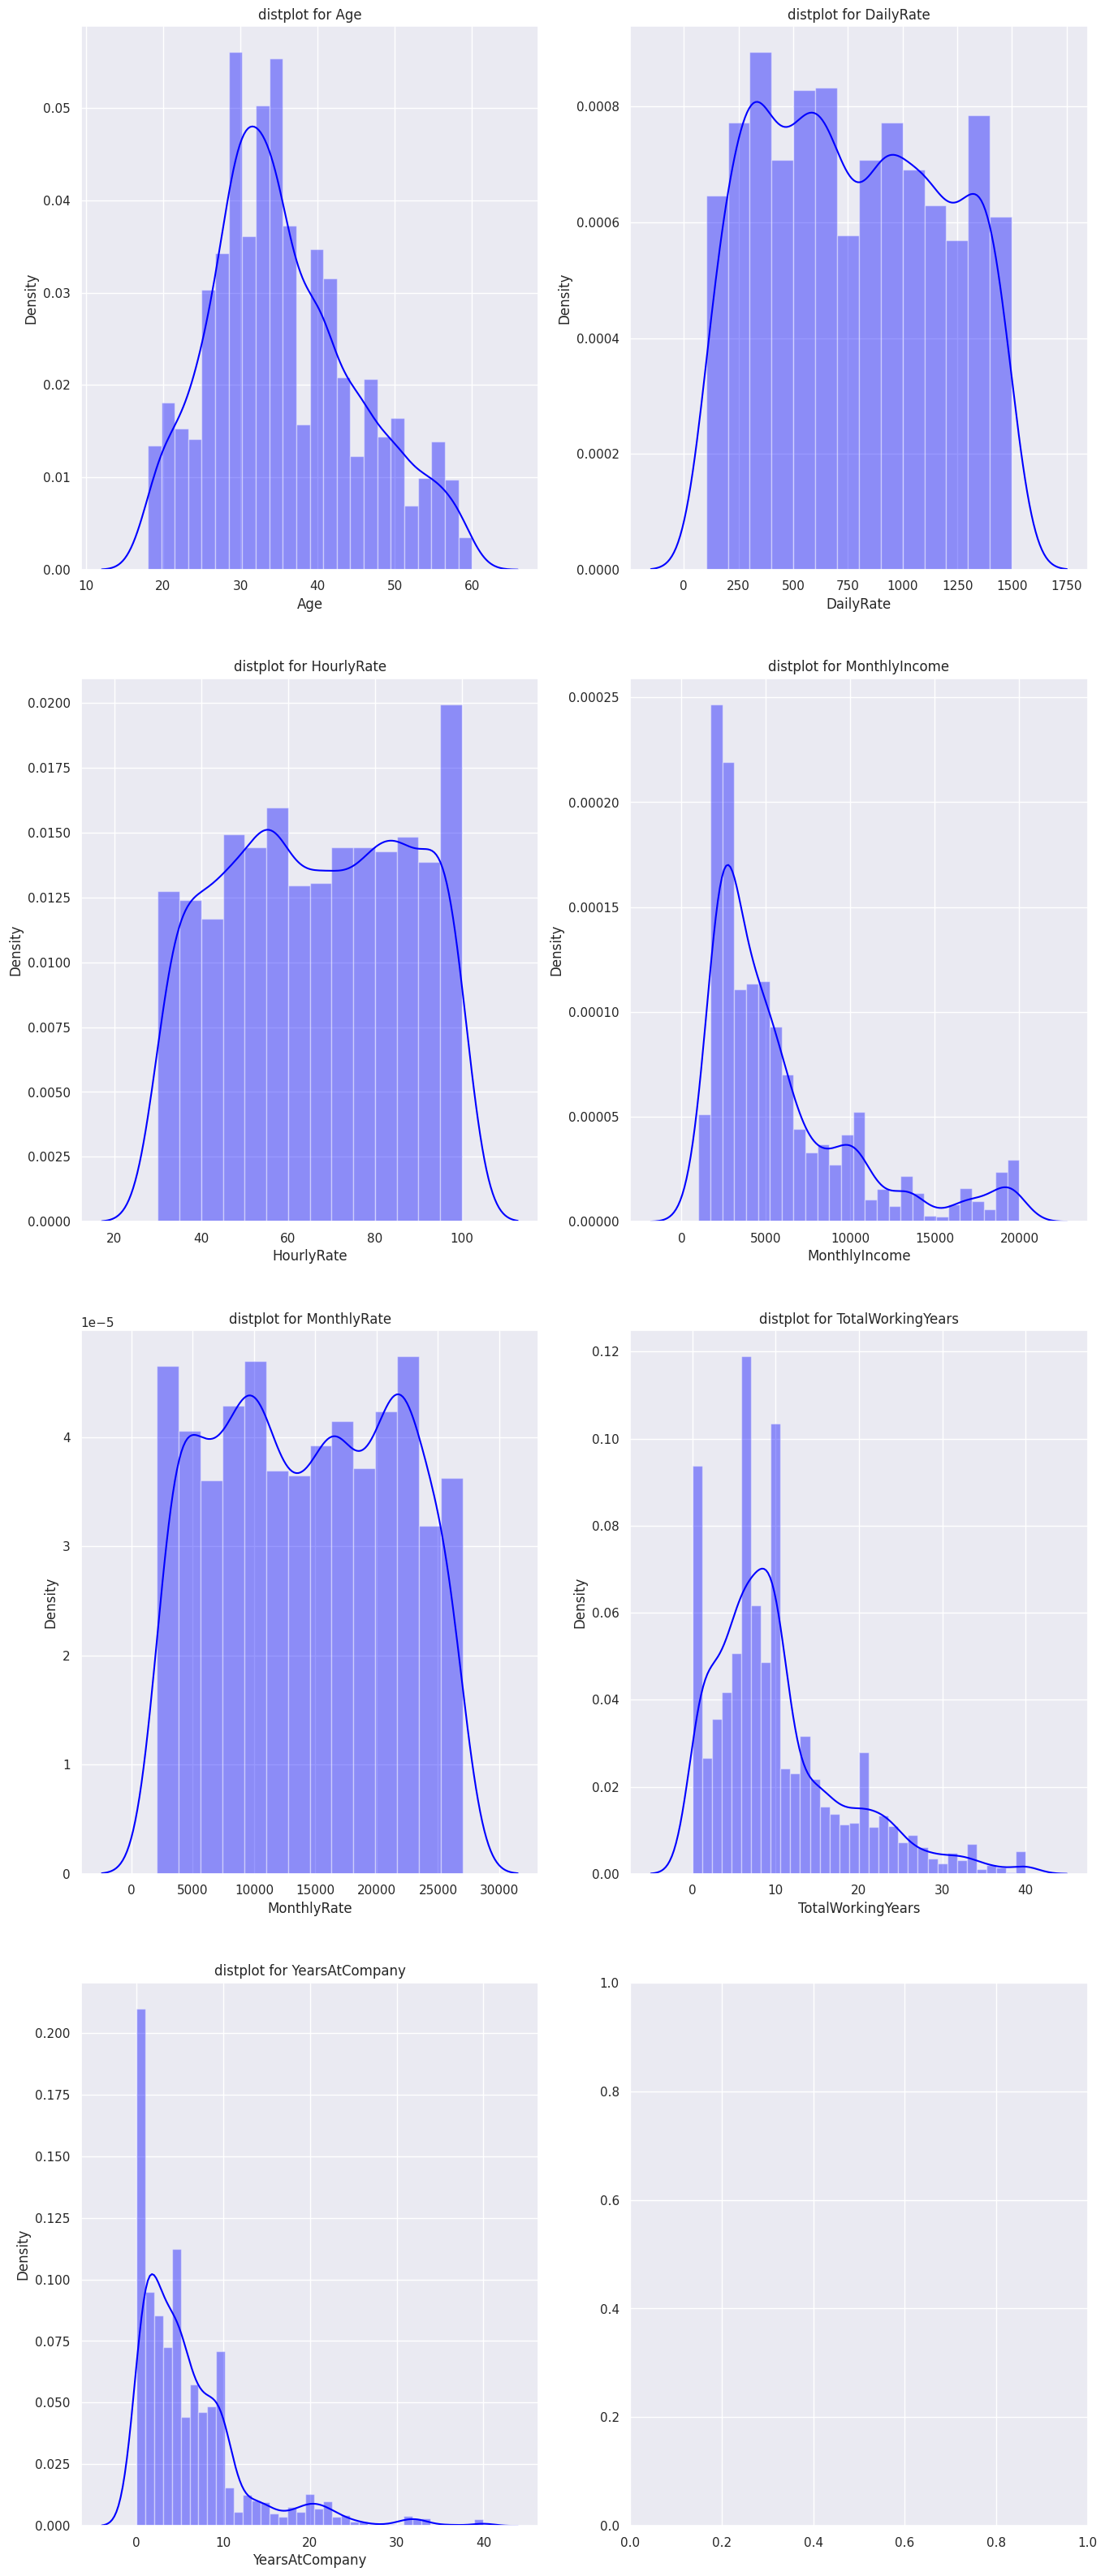

In [42]:
rows=(len(num)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(num):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.distplot(df[col],ax=ax,kde=True,color='blue')
    ax.set_title(f'distplot for {col}')

- All these columns are skewed they are having outliers

## Plotting Distplot for numerical columns with less unique values


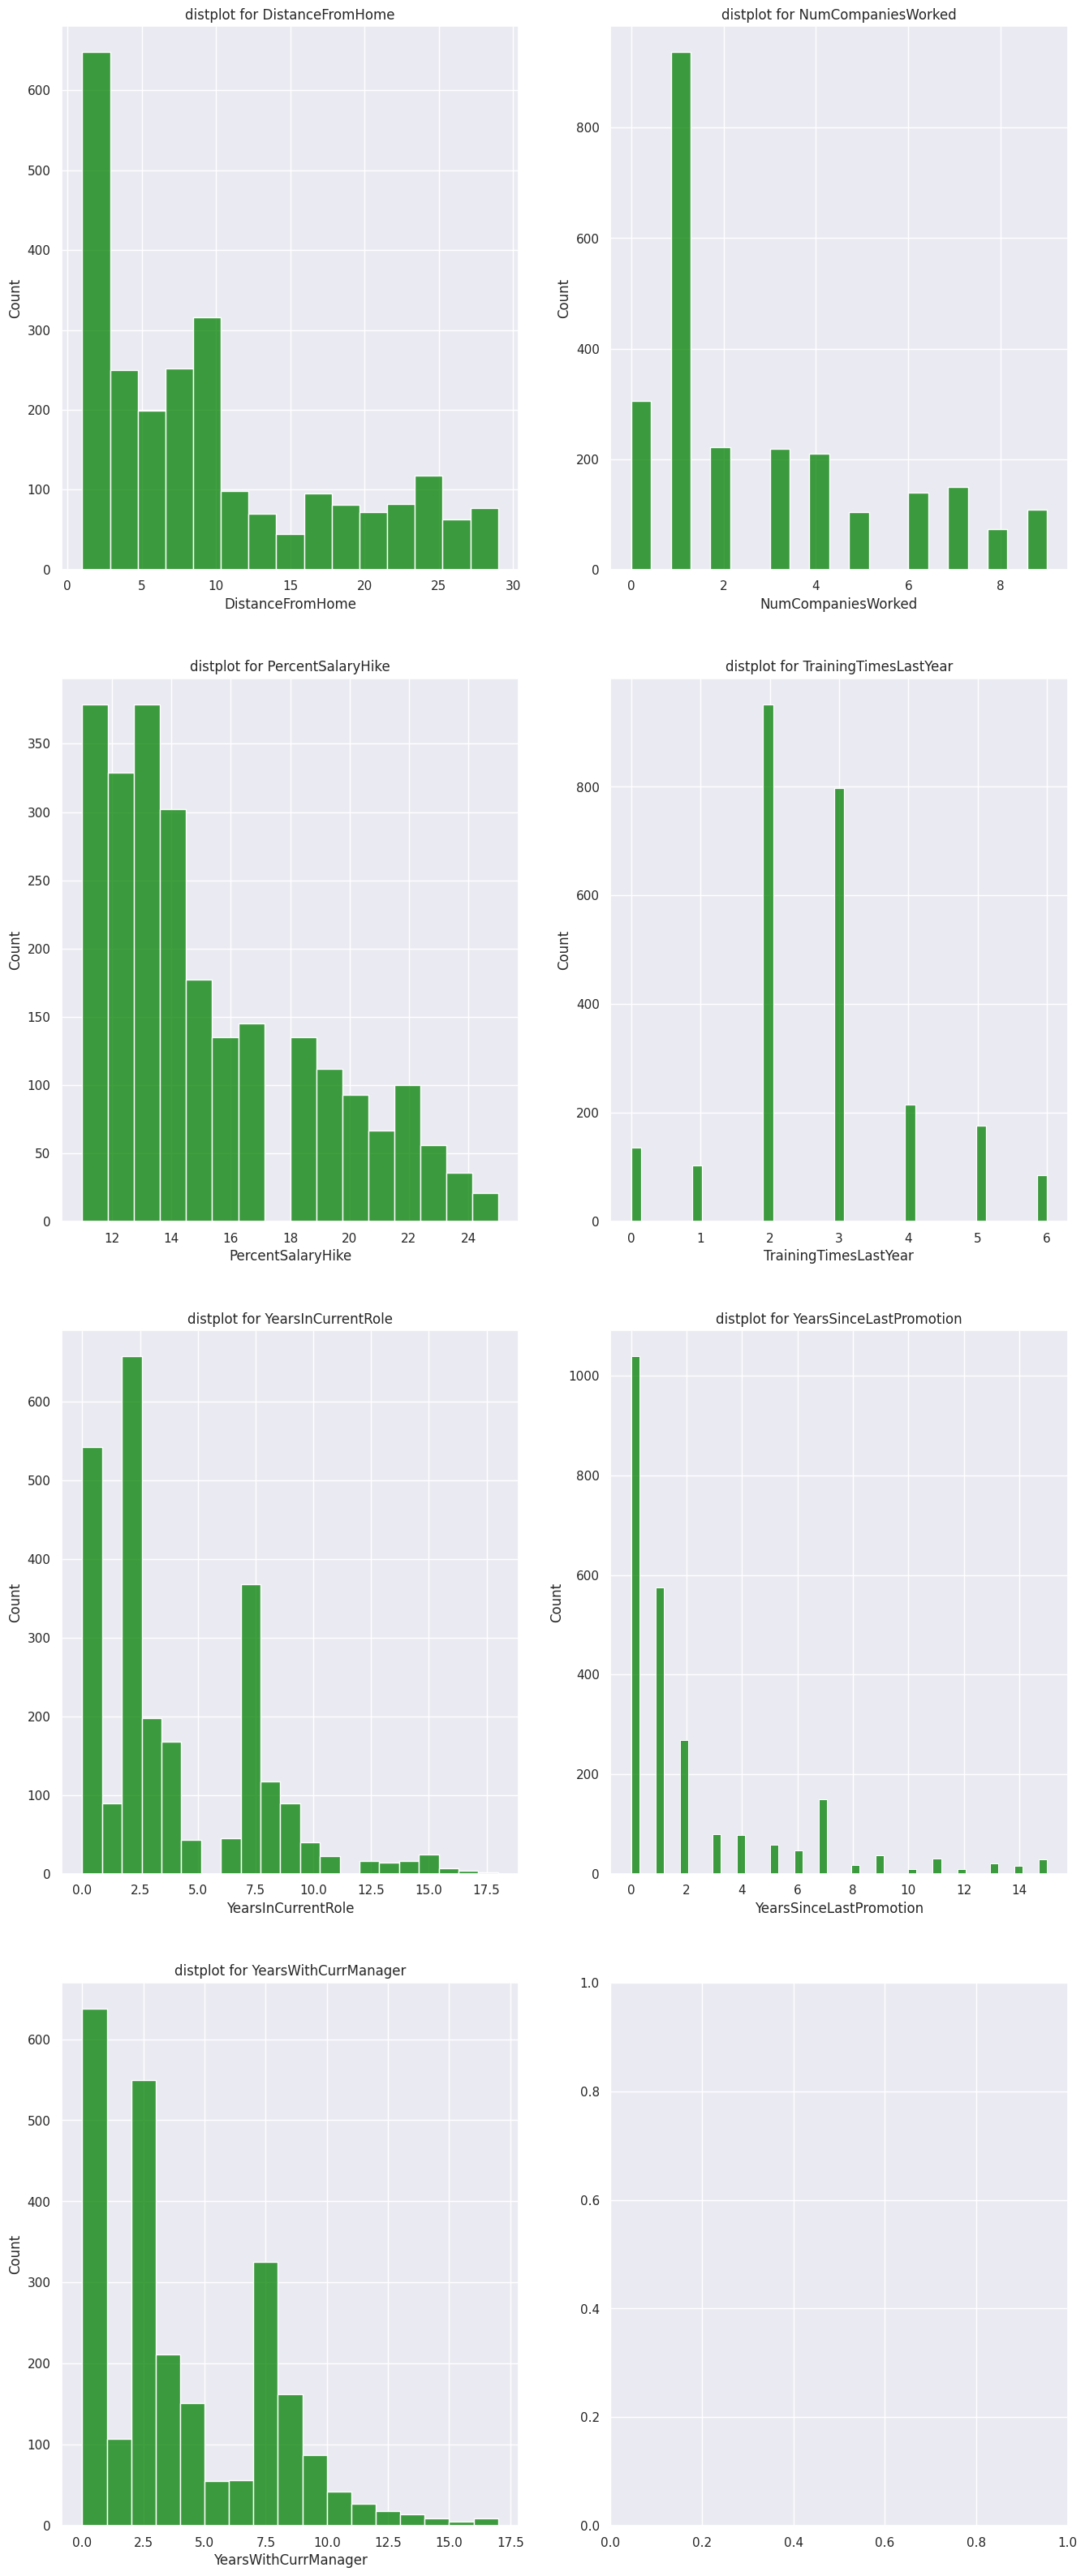

In [43]:
rows=(len(numl)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(numl):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.histplot(df[col],ax=ax,color='green')
    ax.set_title(f'distplot for {col}')

 most of the employees
  - are having 0-1 unit of distance from home
  - are worked in only 1 company
  - had 11-14% hike
  - had 2-3 training year
  - have year of experience is 2 in current company
  

## Plotting Countplot for binary Categorical Feature

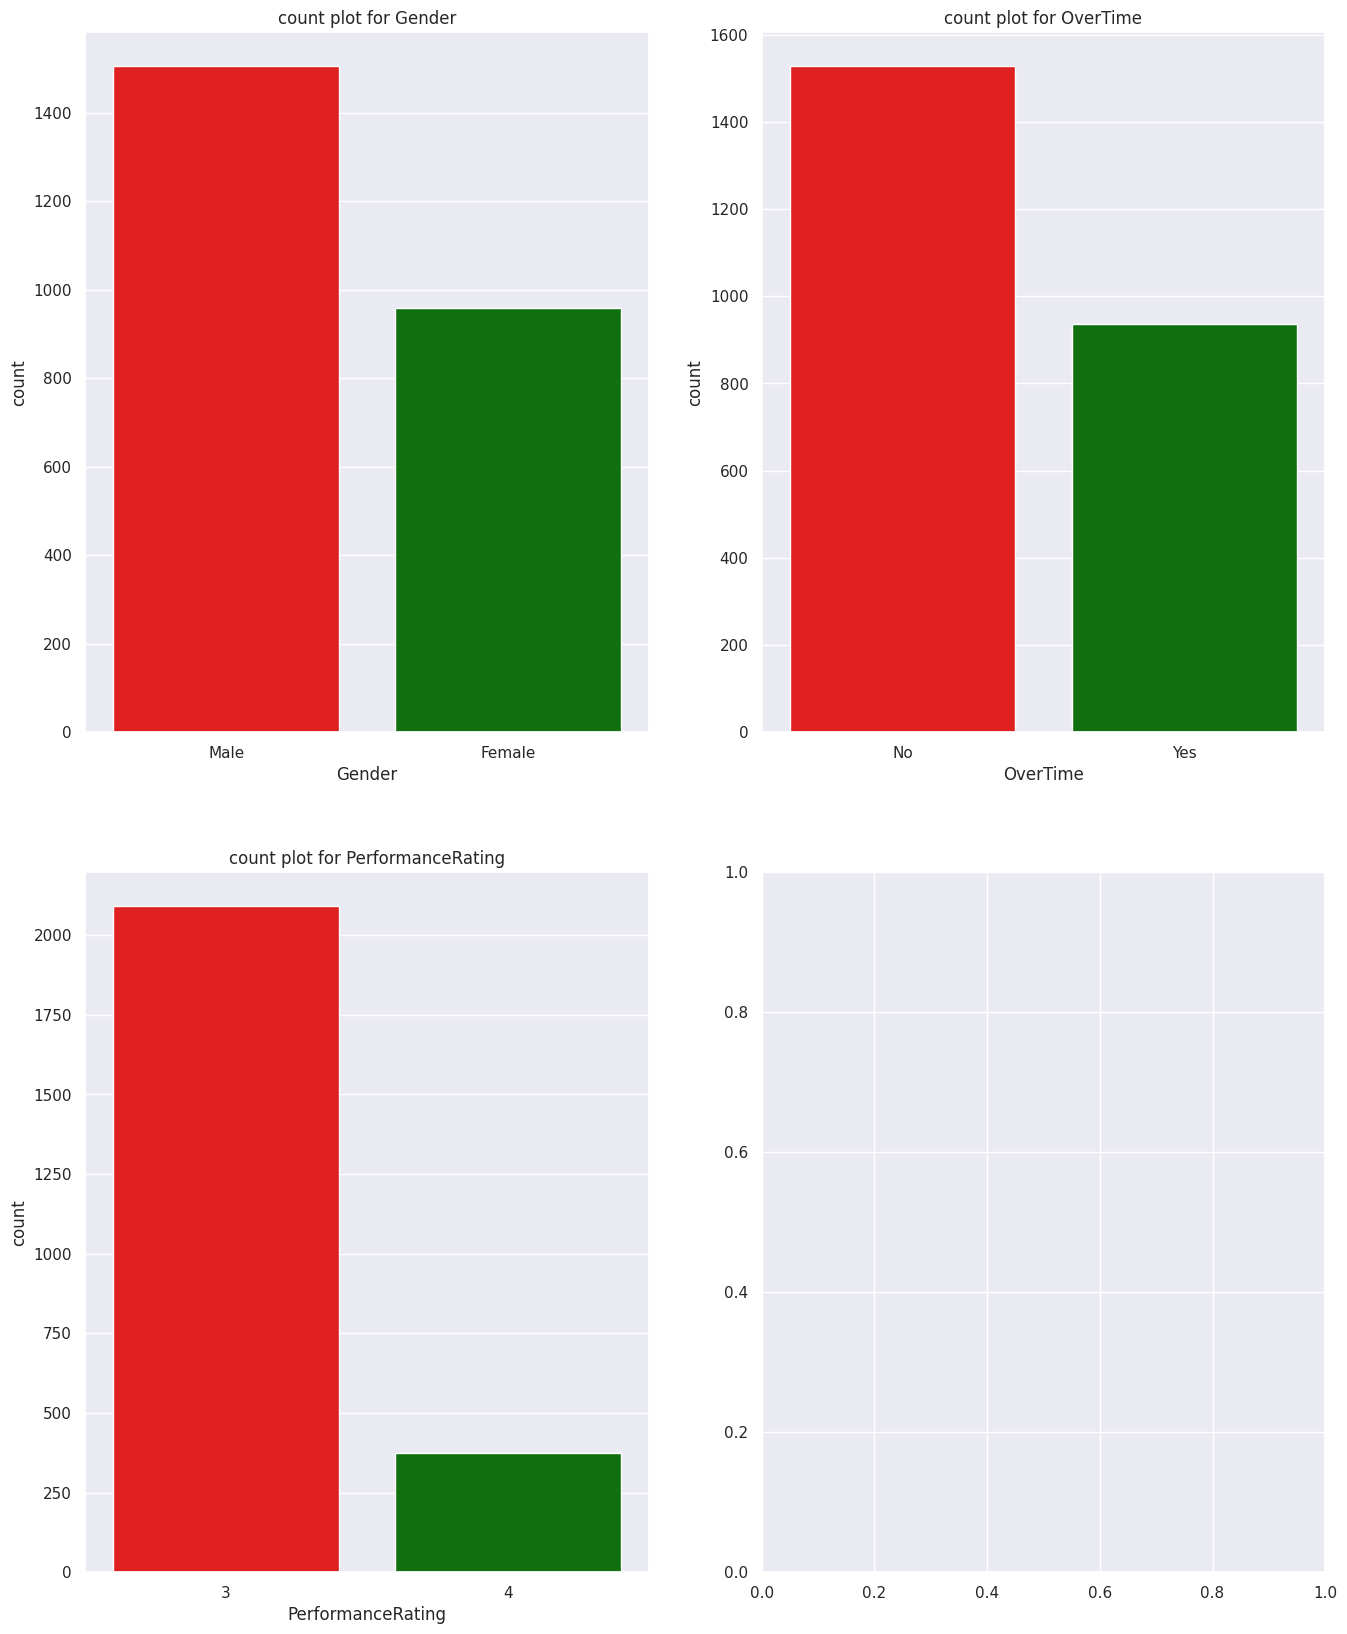

In [44]:
bin=[i for i in cat+cat1 if df[i].nunique()==2]
rows=(len(bin)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(bin):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(x=col,data=df,ax=ax,palette=['red',"green"])
    ax.set_title(f'count plot for {col}')

In [45]:
axes

array([[<Axes: title={'center': 'count plot for Gender'}, xlabel='Gender', ylabel='count'>,
        <Axes: title={'center': 'count plot for OverTime'}, xlabel='OverTime', ylabel='count'>],
       [<Axes: title={'center': 'count plot for PerformanceRating'}, xlabel='PerformanceRating', ylabel='count'>,
        <Axes: >]], dtype=object)

In [46]:
bin

['Gender', 'OverTime', 'PerformanceRating']

most of the empoyees
 - are male
 - dont work overtime
 - have performance rating 3

## Countplot for rest of the columns

In [47]:
#creating list of columns which doesn't include yes/no features
non_bin=[i for i in cat if i not in bin]

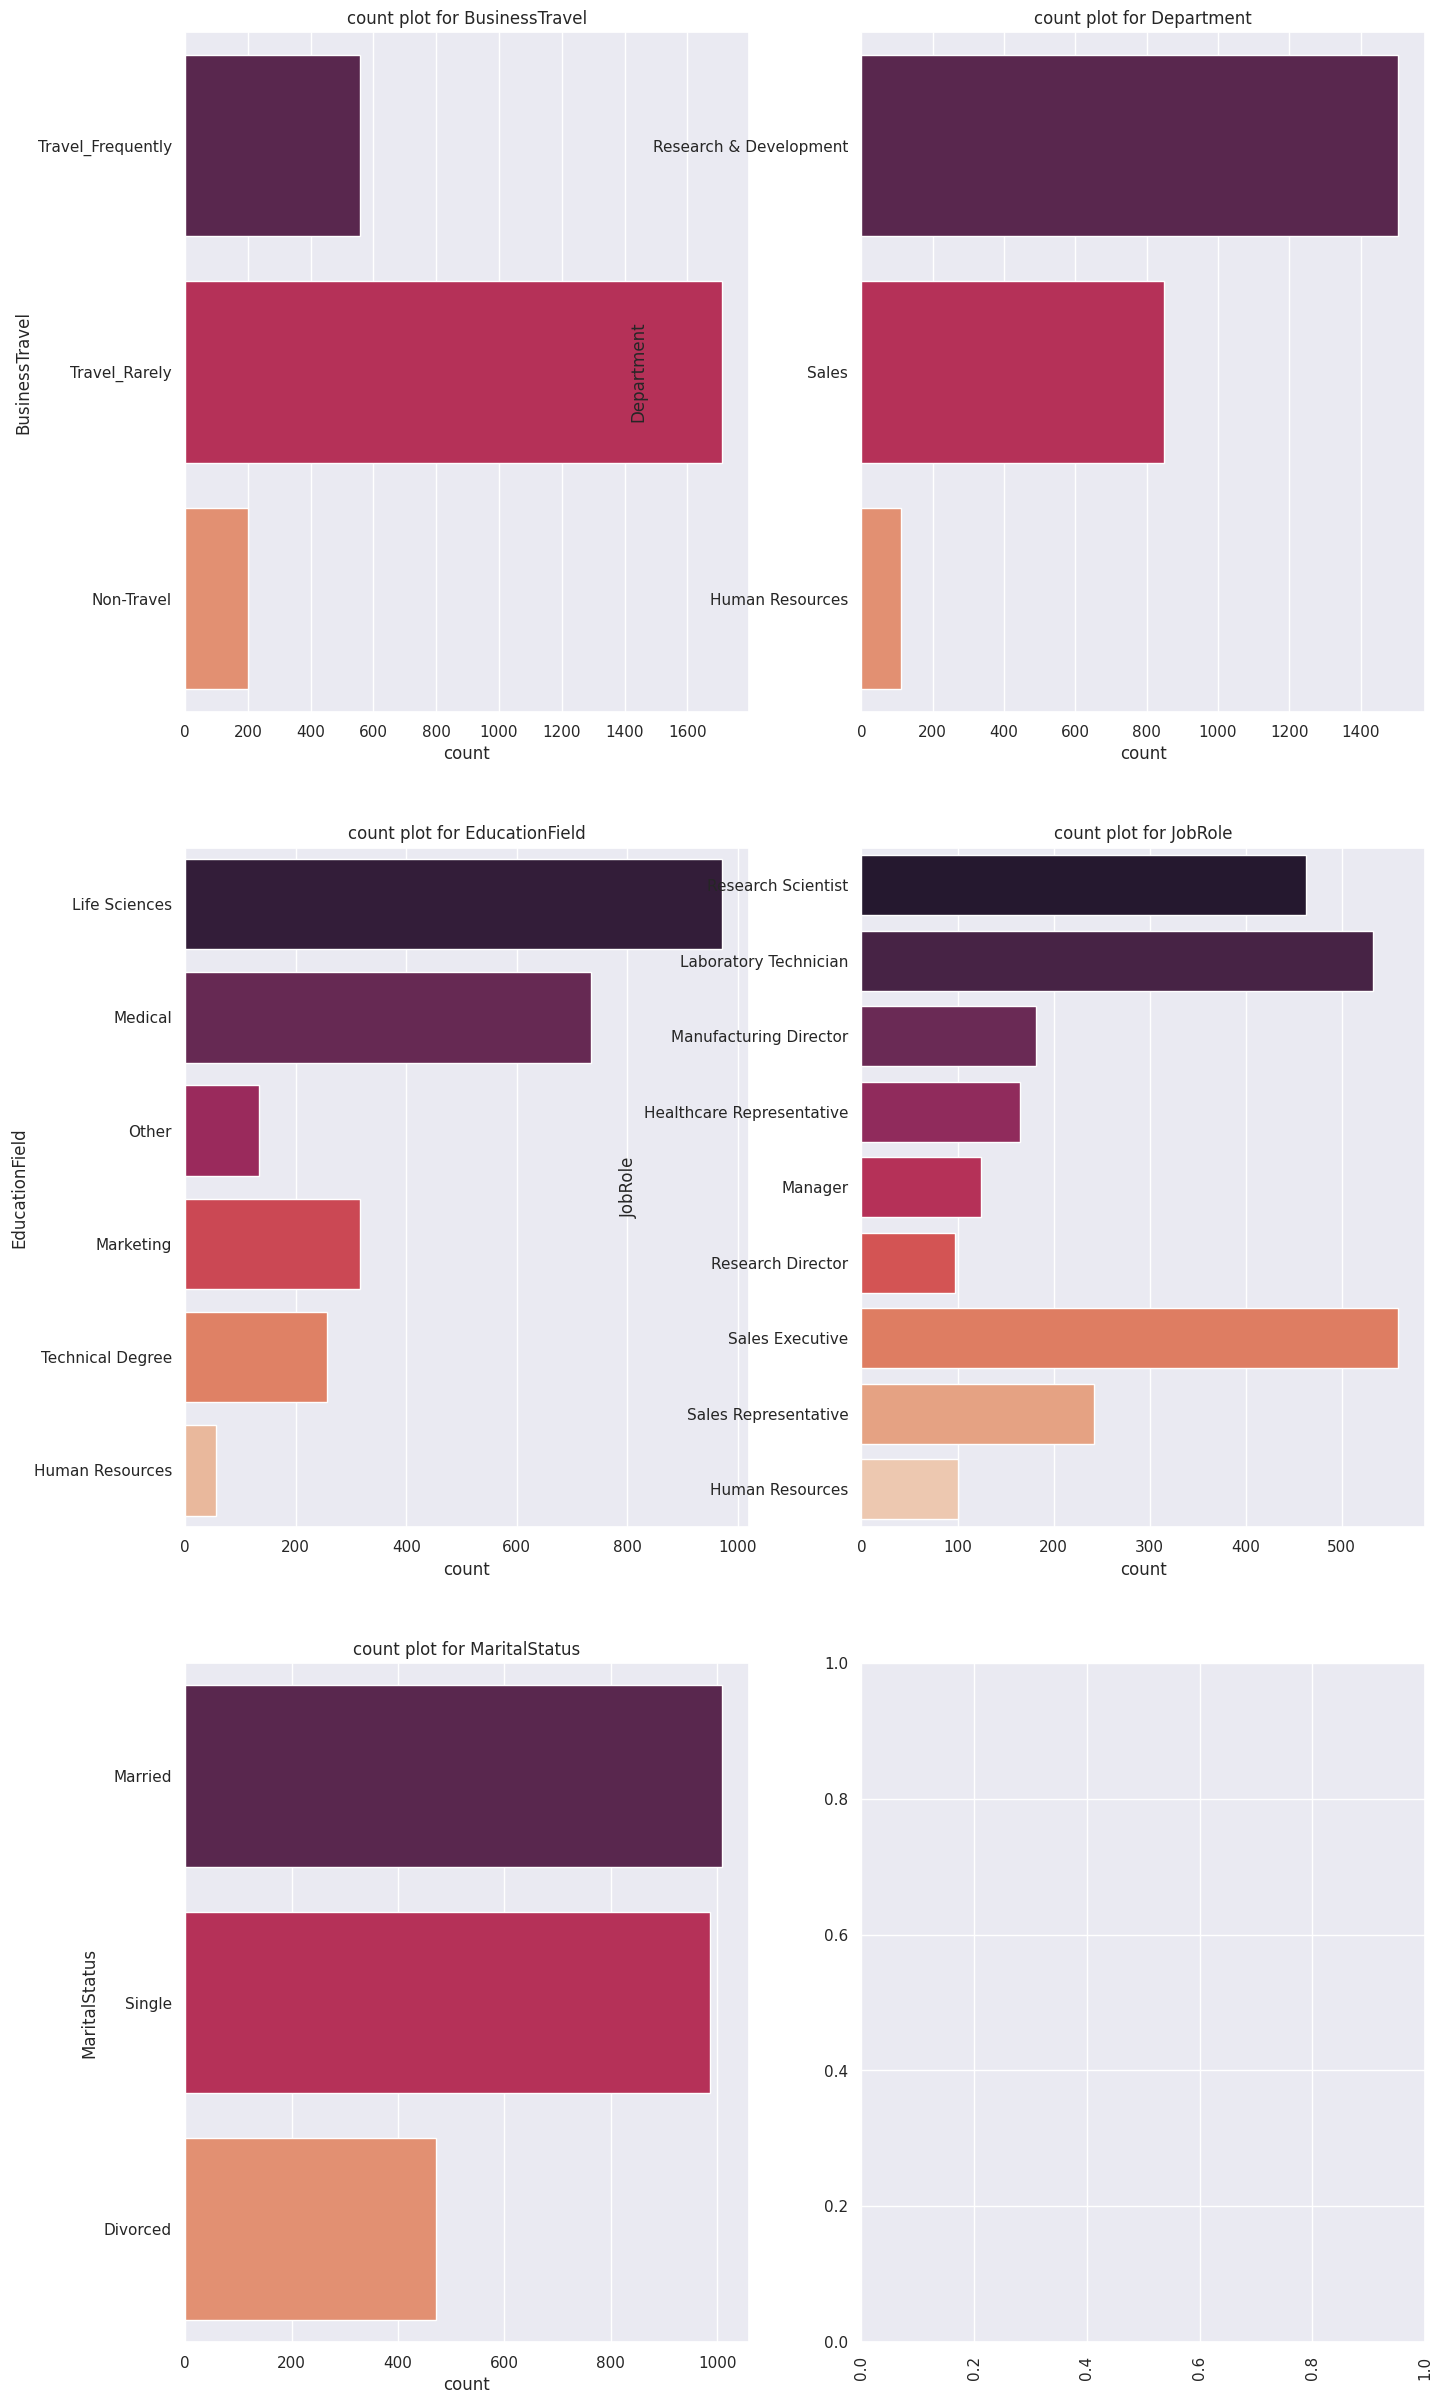

In [48]:
rows=(len(non_bin)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(non_bin):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(df[col],ax=ax,palette='rocket')
    ax.set_title(f'count plot for {col}')

    plt.xticks(rotation='vertical')

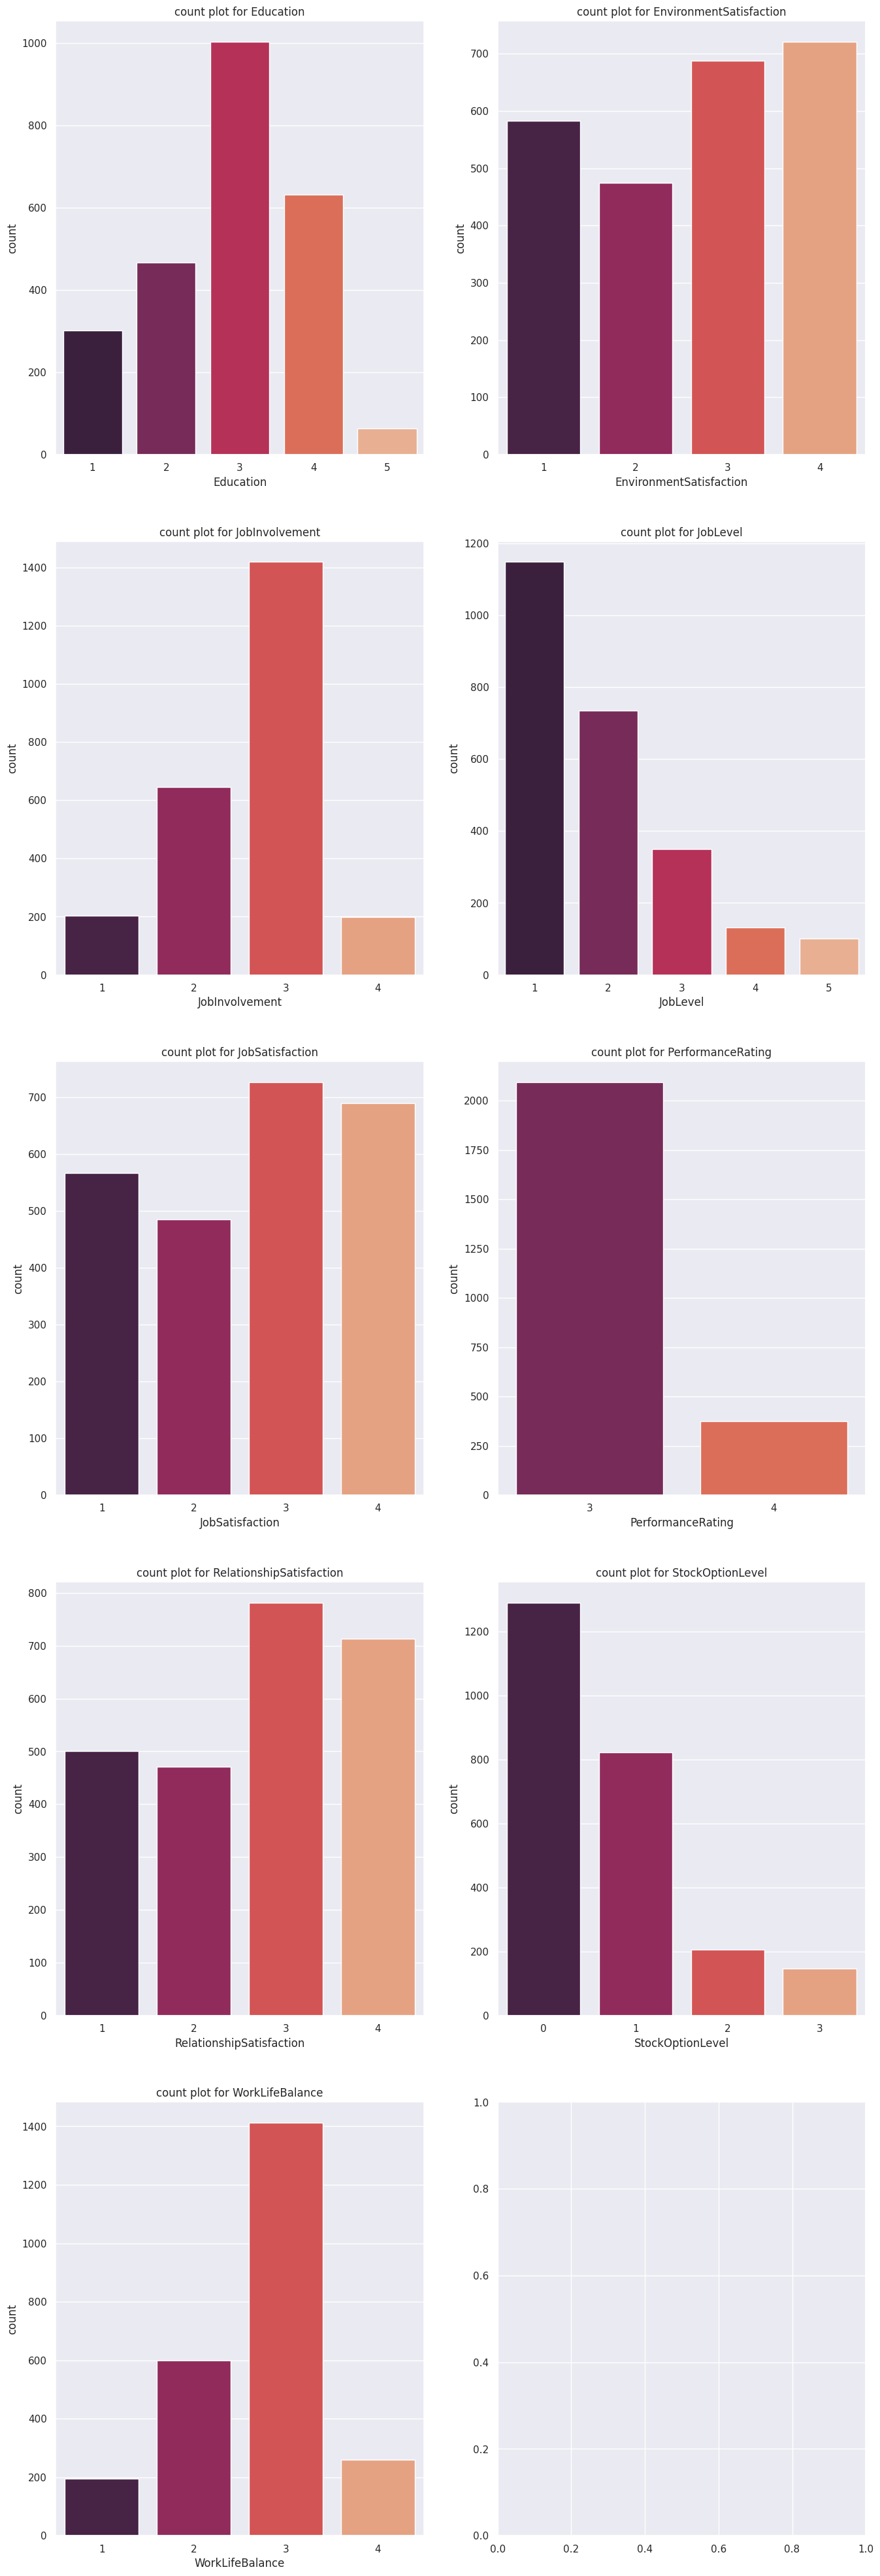

In [49]:
rows=(len(cat1)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(cat1):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(x=df[col],ax=ax,palette='rocket')
    ax.set_title(f'count plot for {col}')




most of the employees
 - Travel rarely
 - from research and development
 - are married
 - have education 3
 - Environment satisfication 3 or 4
 - job involment 3
 - in job level 1 or 2
 - jobsatisfaction 2 or 3
 - relationship satisfactio 3 or 4
 - stock option level 0 or 1
 - work life balance 3
Very less employees are from Resource field

## Outlier Analysis

## Plotting Boxplot

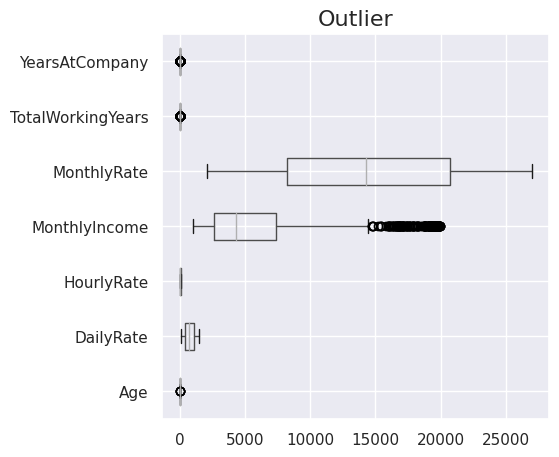

In [50]:
#plotting columns in the lar list
plt.figure(figsize=(5,5))
df[num].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

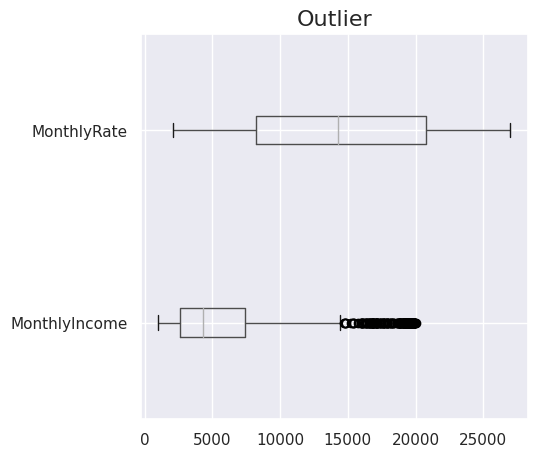

In [51]:


plt.figure(figsize=(5,5))
df[['MonthlyIncome','MonthlyRate']].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()


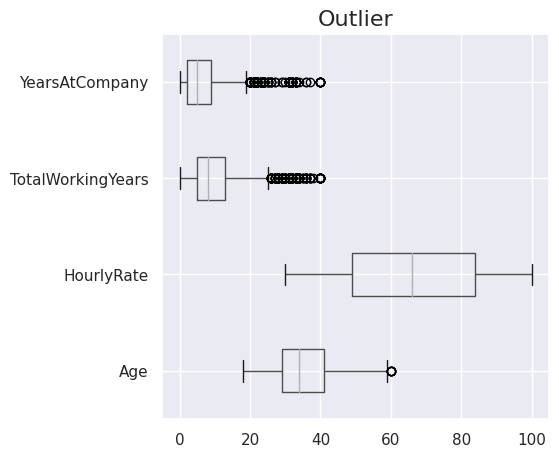

In [52]:
# prompt: plot box plot for every column  in num in one plot excepect monthy rate and monthly income
tem=df[num].drop(['MonthlyRate','MonthlyIncome','DailyRate'],axis=1)
plt.figure(figsize=(5,5))
tem.boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()


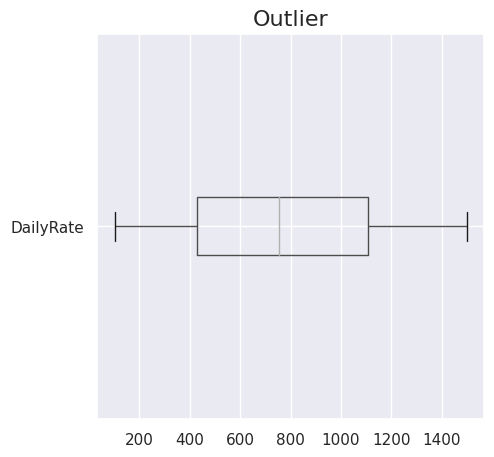

In [53]:

plt.figure(figsize=(5,5))
df[['DailyRate']].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

years at company ,total working years and monthly income has outlier

# Bivariate Analysis

## Plotting distplot for numerical columns

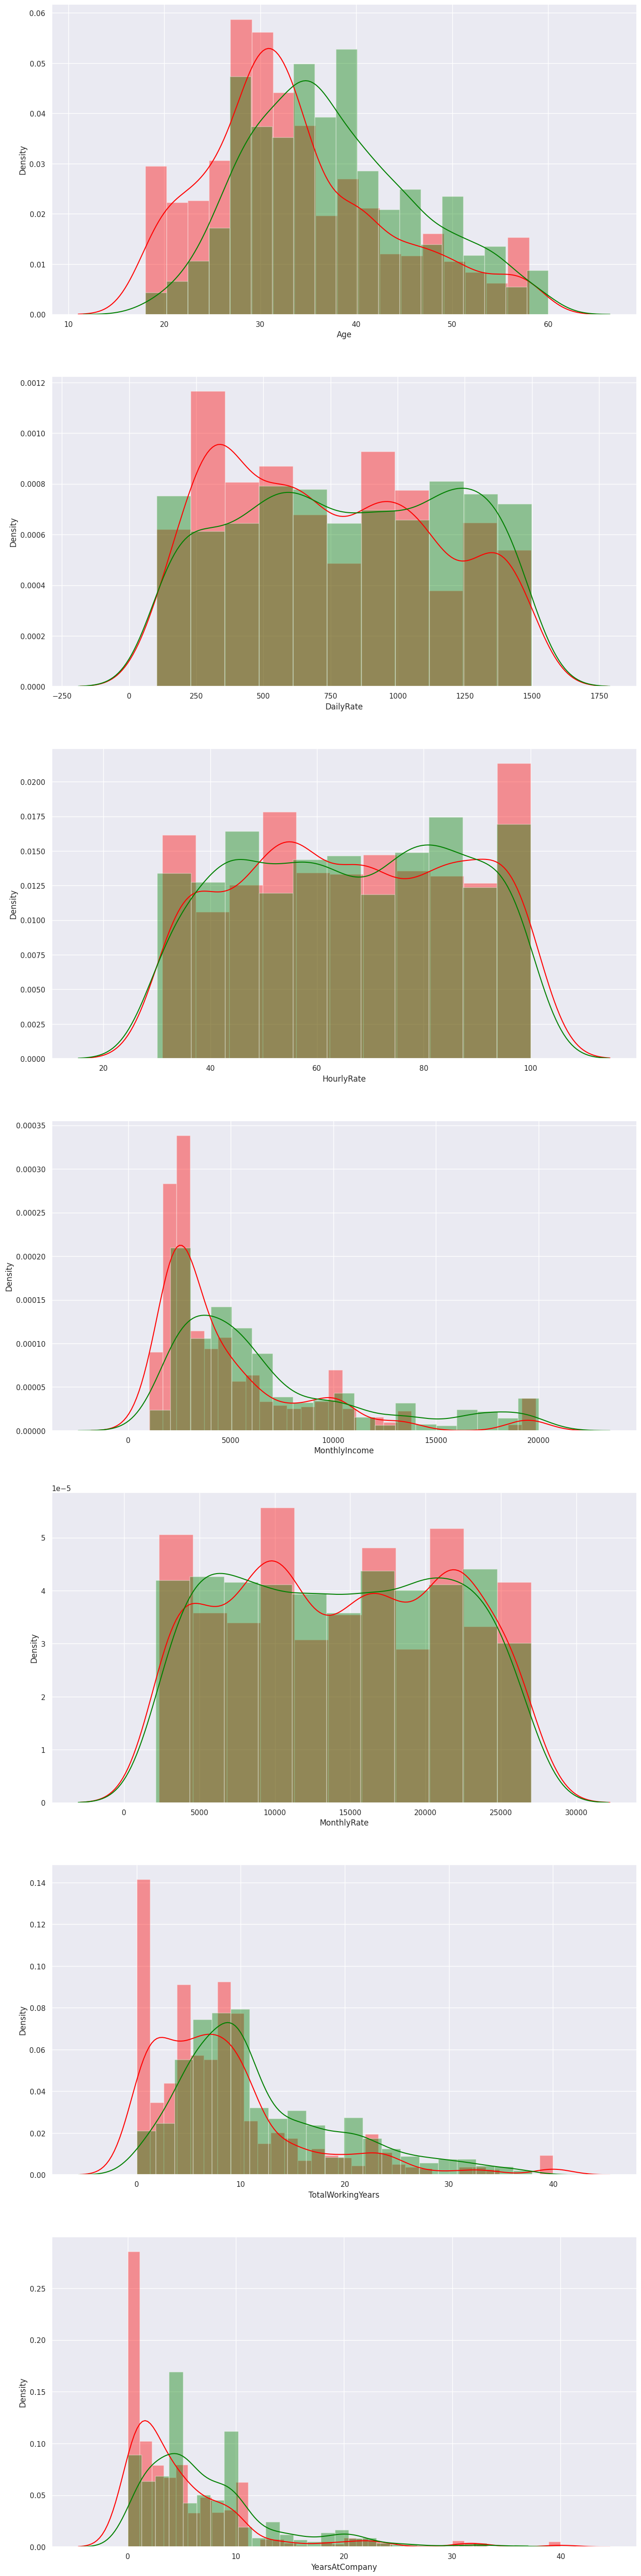

In [54]:
#plotting distplot of numerical records of the target classes seperately
rows=len(num)
fig,axes=plt.subplots(rows,1,figsize=(16,10*rows))
for i,col in enumerate(num):

    ax=axes[i]
    sns.distplot(df[df['Attrition']=='Yes'][col],ax=ax,color='red')
    sns.distplot(df[df['Attrition']=='No'][col],ax=ax,color='green')



- most of the employee who left the comany has lesser age less daily rate,less monthly income ,less experience and lesser years at company

## Plotting histplot for numerical columns with less unique values

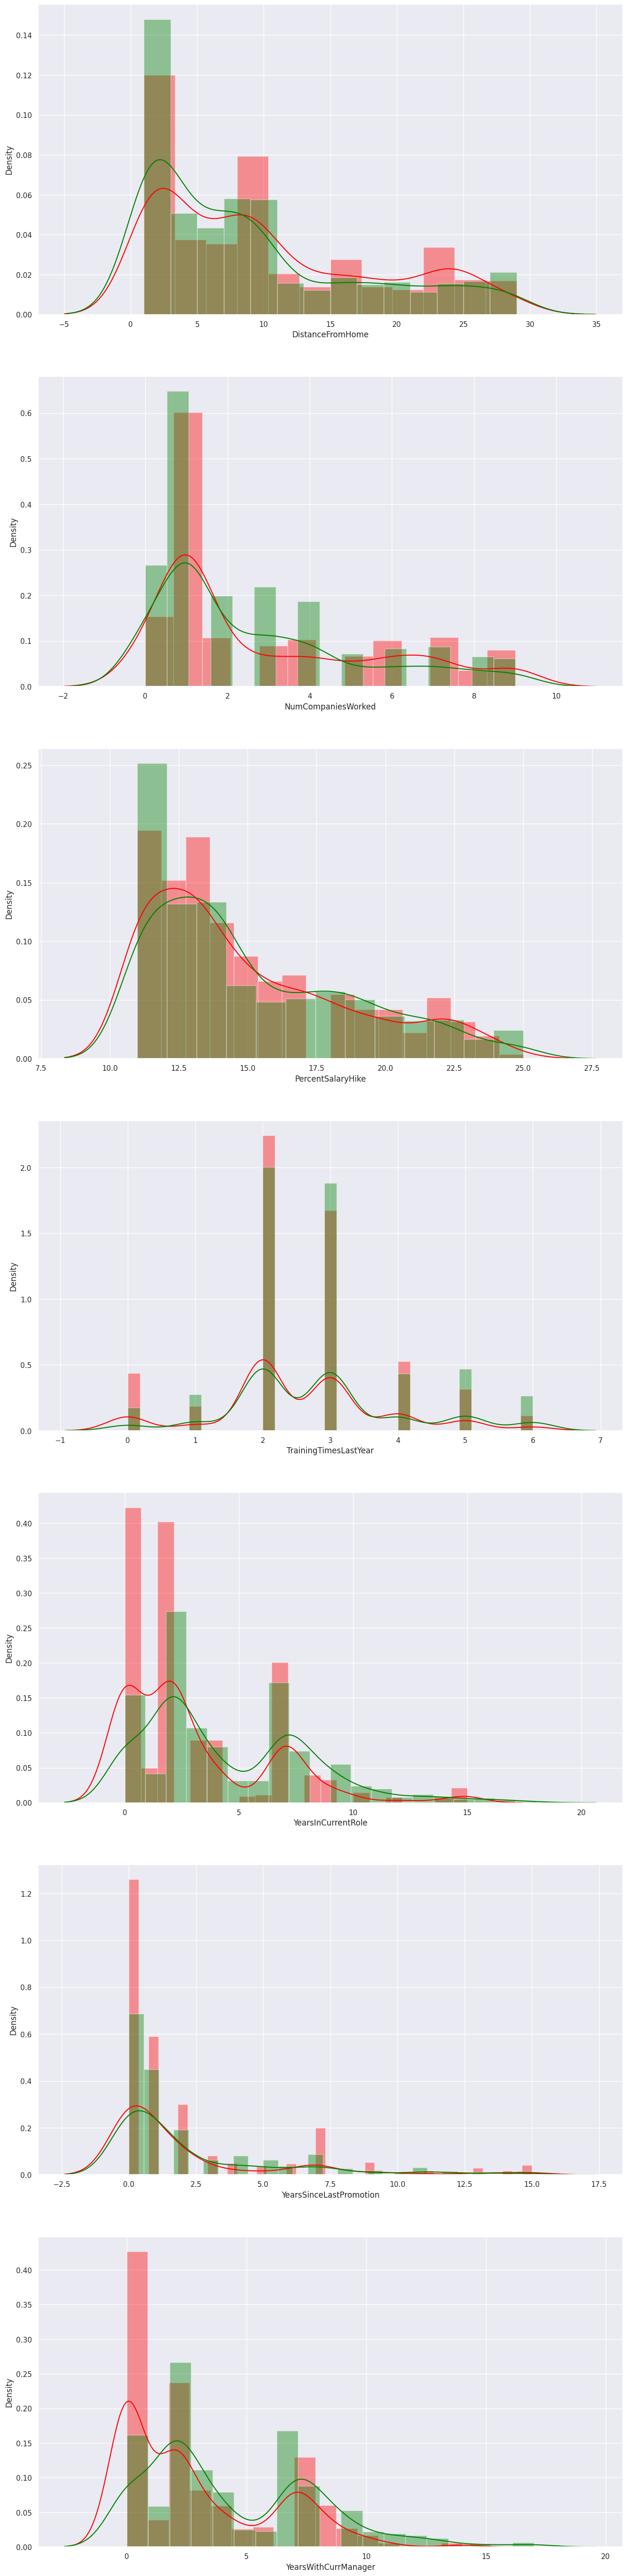

In [55]:
rows=len(numl)
fig,axes=plt.subplots(rows,1,figsize=(16,10*rows))
for i,col in enumerate(numl):

    ax=axes[i]
    sns.distplot(df[df['Attrition']=='Yes'][col],ax=ax,color='red')
    sns.distplot(df[df['Attrition']=='No'][col],ax=ax,color='green')

most of the employees who left the company have long distance from the chouse,lesser experience in current role and current manager

## Binary Categorical column vs target

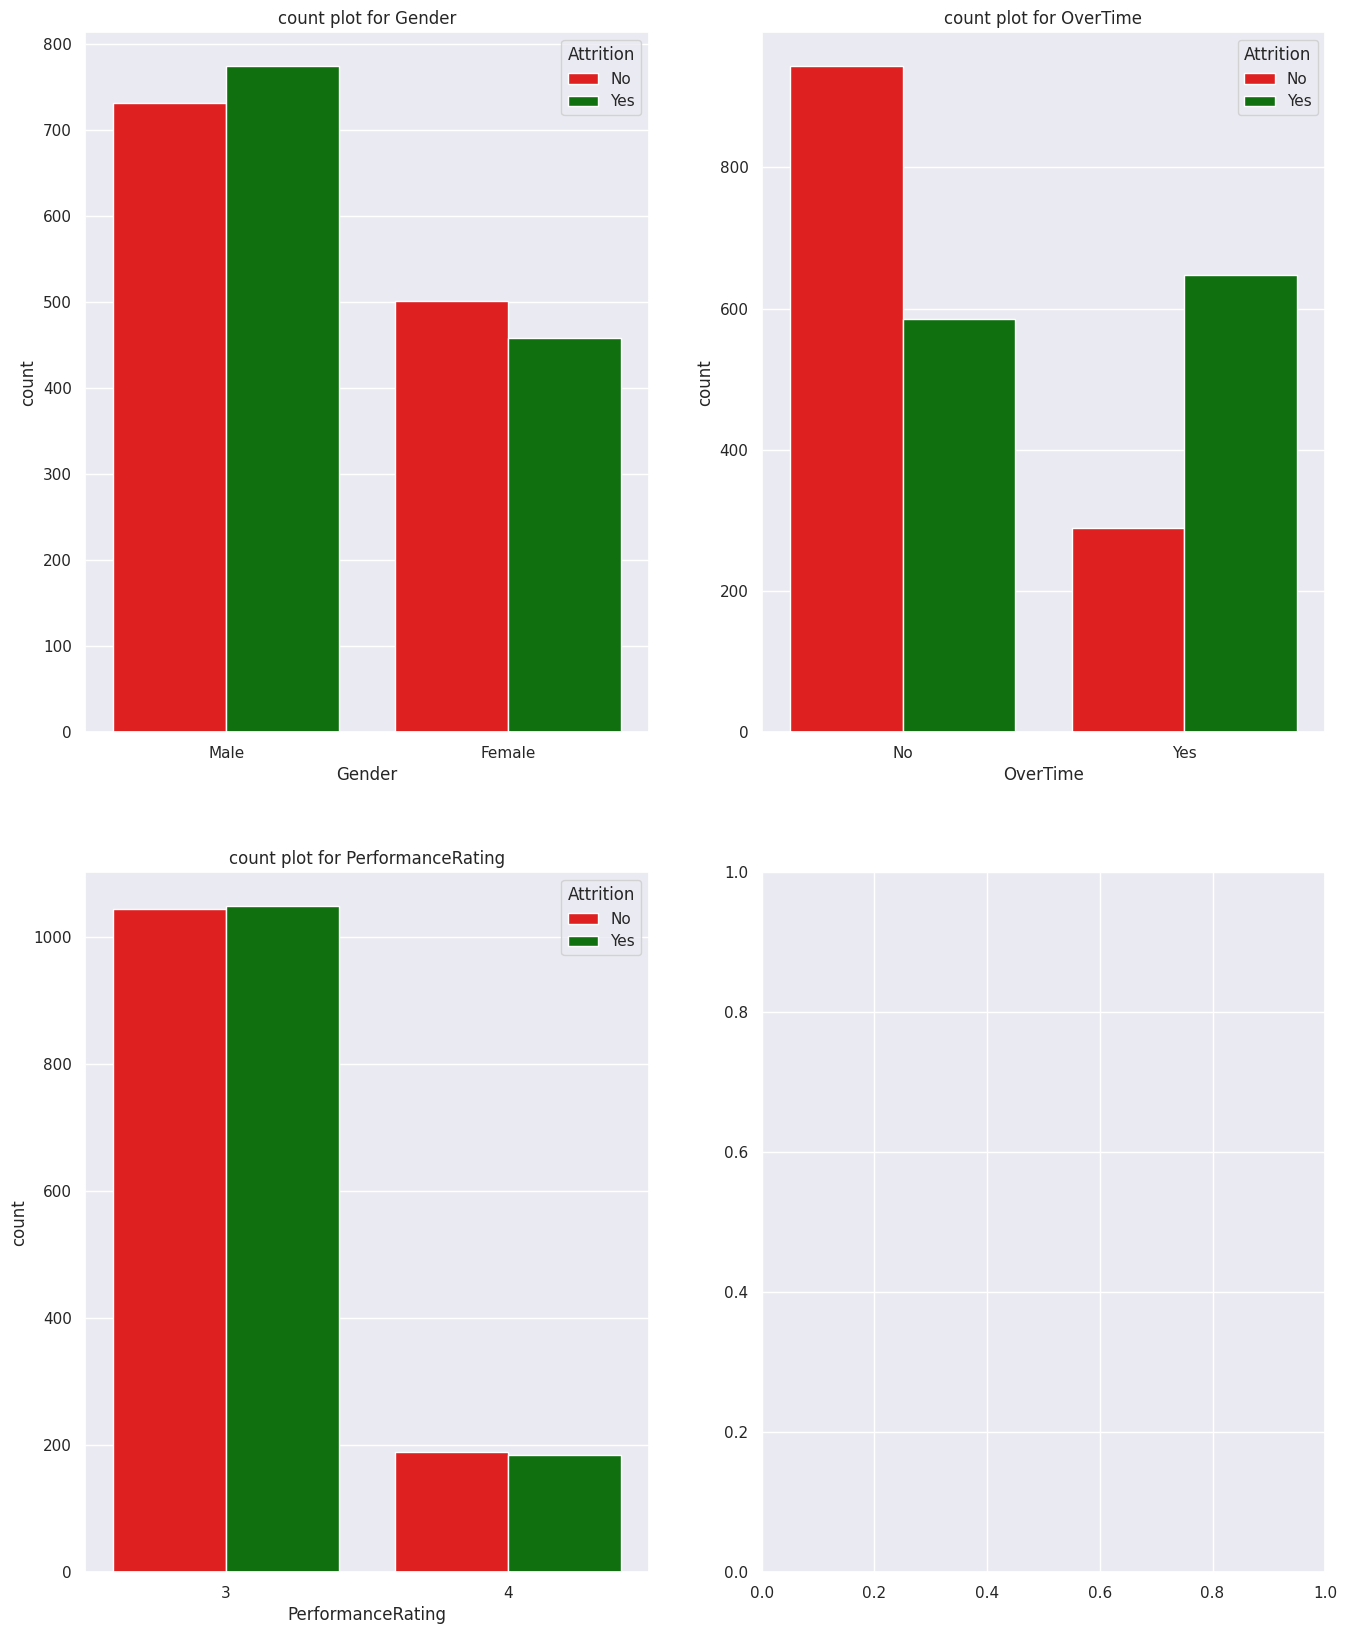

In [57]:
bin=[i for i in cat+cat1 if df[i].nunique()==2]
rows=(len(bin)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(bin):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(x=col,data=df,ax=ax,hue='Attrition',palette=['red',"green"])
    ax.set_title(f'count plot for {col}')

most of the employees who left the company did overtime

## Non binary categorical columns vs target column

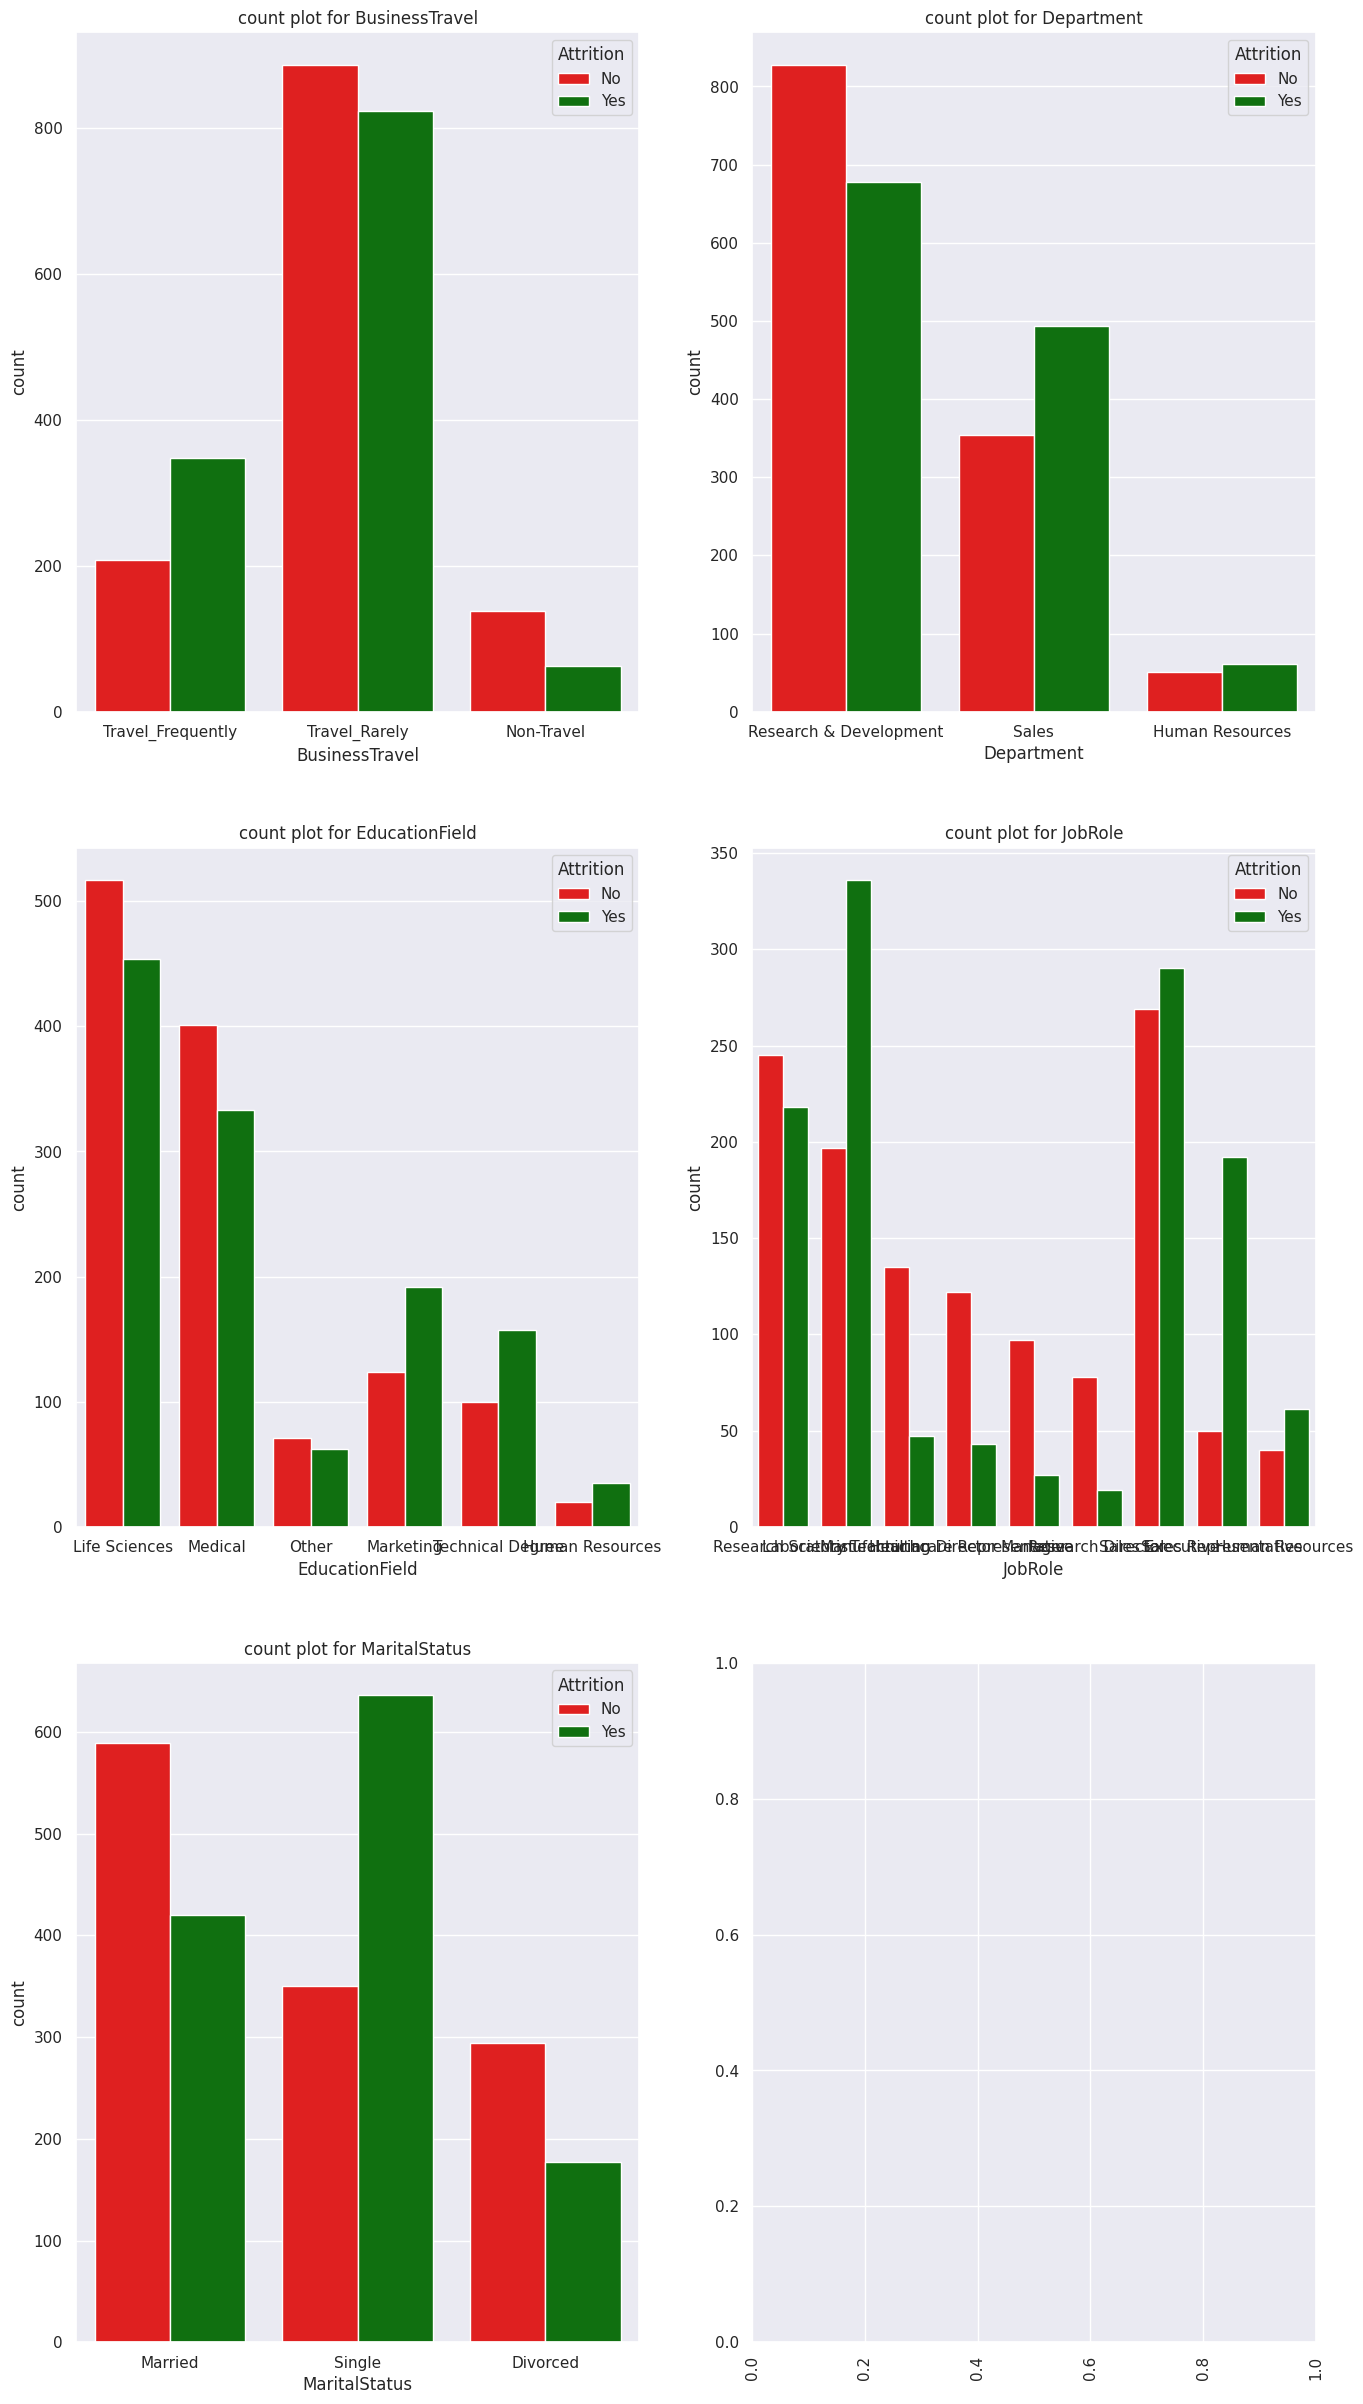

In [58]:
rows=(len(non_bin)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(non_bin):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(x=col,data=df,ax=ax,hue='Attrition',palette=['red',"green"])
    ax.set_title(f'count plot for {col}')
    plt.xticks(rotation=90)

- Proportion of employees  left is more for frequently travelled,single,environmentsatisfaction of score 1,job level one is more  comparing to other classes in the category columns


## Bivariate Analysis in Numerical columns

<Figure size 1000x600 with 0 Axes>

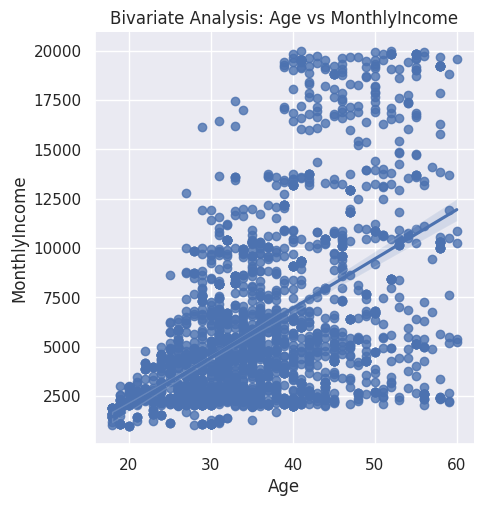

In [59]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Age', y='MonthlyIncome', data=df)
plt.title('Bivariate Analysis: Age vs MonthlyIncome')
plt.show()

<Figure size 1000x600 with 0 Axes>

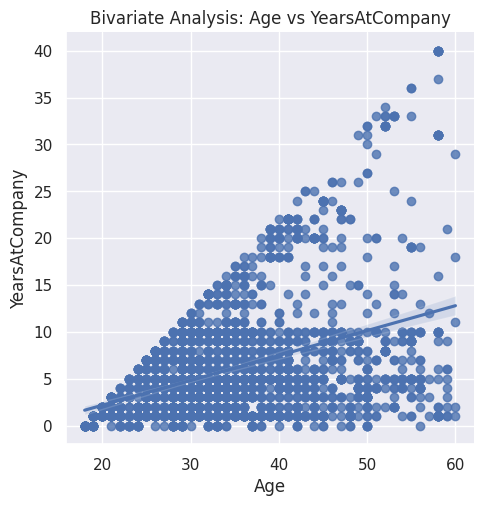

<Figure size 1000x600 with 0 Axes>

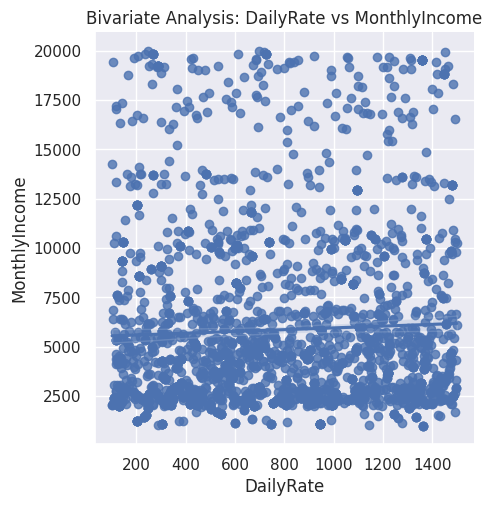

<Figure size 1000x600 with 0 Axes>

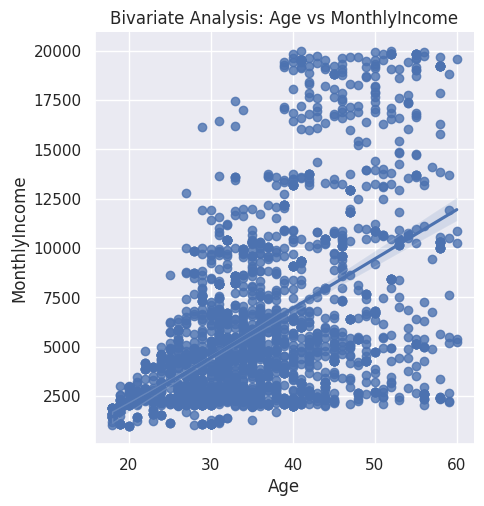

In [60]:
pairs = [
    ('Age', 'YearsAtCompany'),
    ('DailyRate', 'MonthlyIncome'),

    ('Age','MonthlyIncome')
]

# Perform bivariate analysis for each pair
for pair in pairs:
    plt.figure(figsize=(10, 6))
    sns.lmplot(x=pair[0], y=pair[1], data=df)
    plt.title(f'Bivariate Analysis: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

 Age has relation with monthly income and years at company


## Bivariate Analysis bw numerical and categorical columns

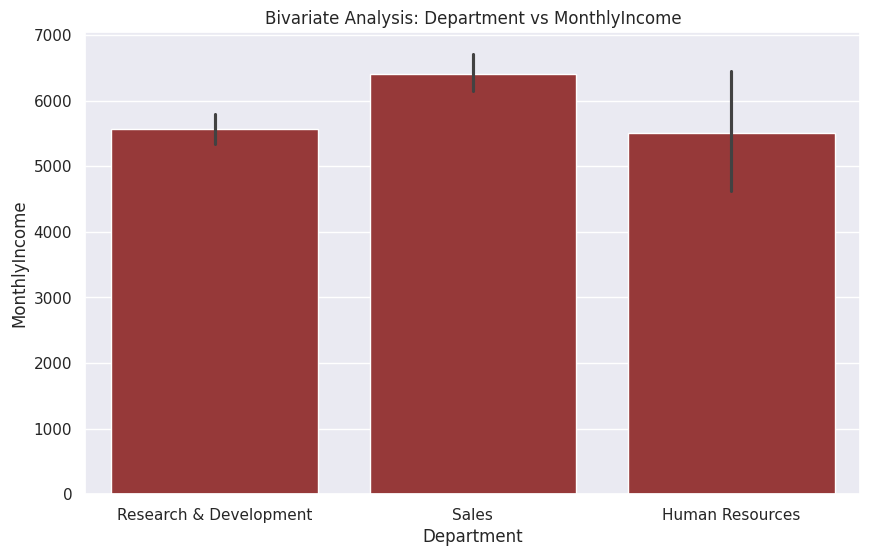

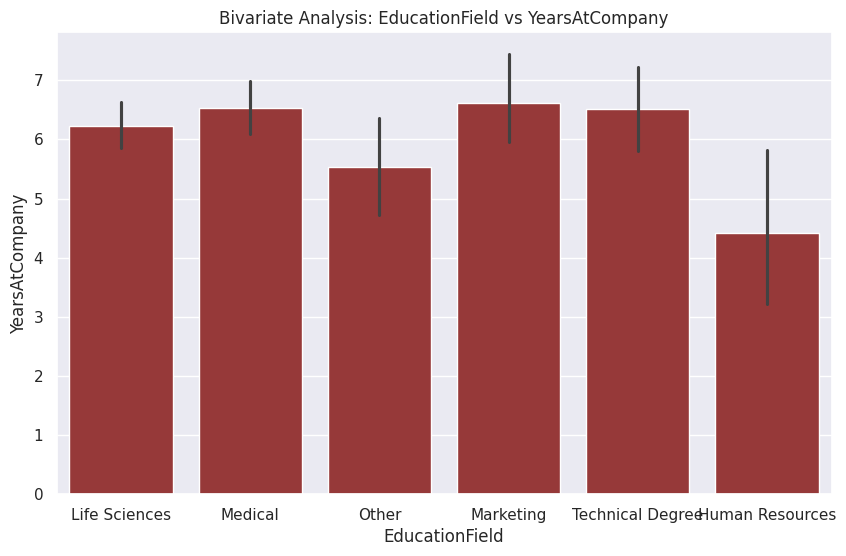

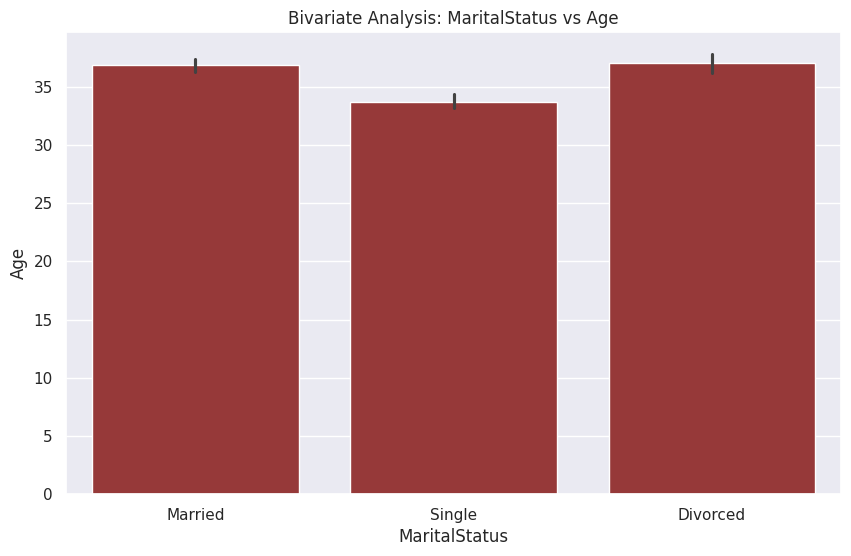

In [61]:
pairs = [
    ('Department', 'MonthlyIncome'),
    ('EducationField', 'YearsAtCompany'),
    ('MaritalStatus', 'Age')
]

# Perform bivariate analysis for each pair
for pair in pairs:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pair[0], y=pair[1], data=df,color='brown')
    plt.title(f'Bivariate Analysis: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

cant find much difference in the bar

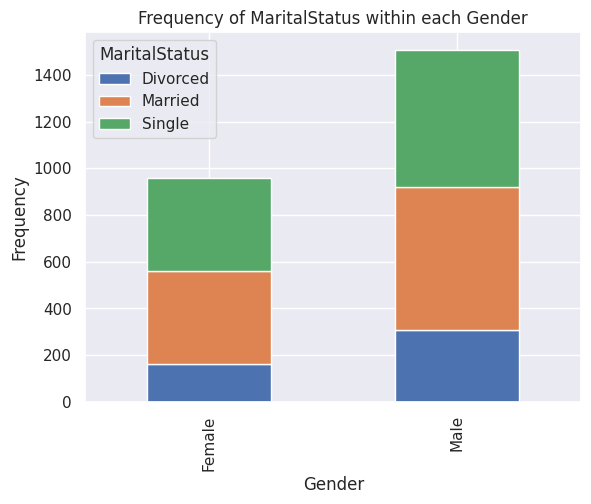

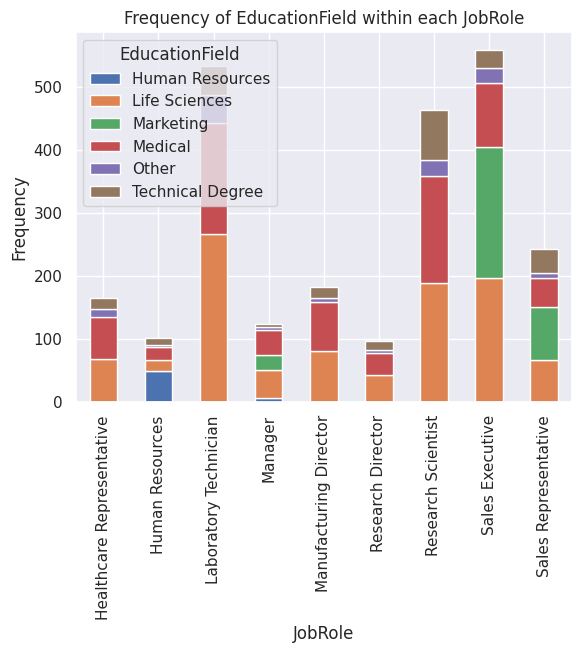

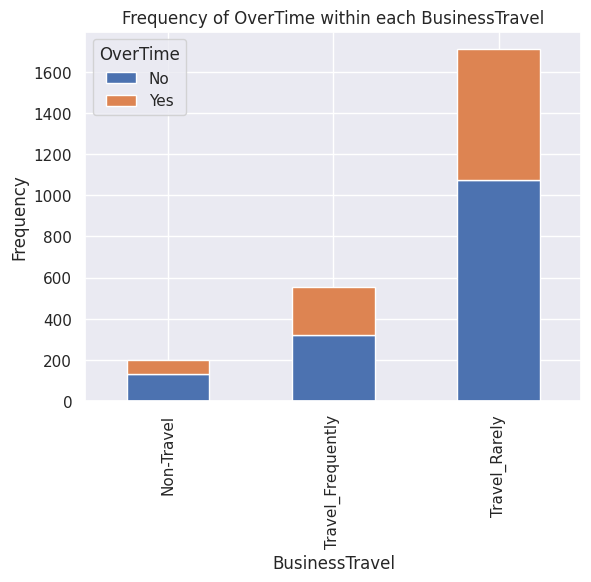

In [62]:
pairs = [
    ('Gender', 'MaritalStatus'),
    ('JobRole', 'EducationField'),
    ('BusinessTravel', 'OverTime')
]

# Plot stacked bar plots for each pair
for pair in pairs:
    # Group by the pair of columns and calculate the frequency
    counts = df.groupby(list(pair)).size().unstack(fill_value=0)

    # Plot stacked bar plot
    counts.plot(kind='bar', stacked=True)
    plt.xlabel(pair[0])
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {pair[1]} within each {pair[0]}')
    plt.legend(title=pair[1])
    plt.show()

# Multivariate Analysis

<Axes: >

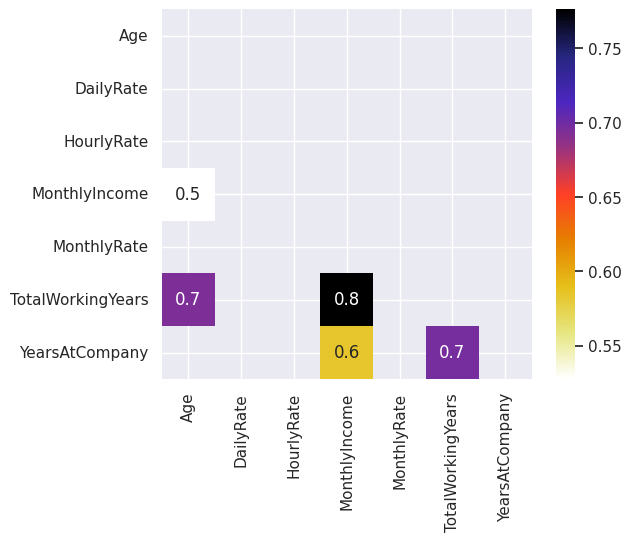

In [63]:
#finding correlation between numerical columns
corr=df[num].corr()
corr1=corr[abs(corr)>.5]
mask=np.triu(corr)
sns.heatmap(corr1, annot=True, fmt = '.1f',mask=mask,square=True, cmap=plt.cm.CMRmap_r)


In [64]:
df.drop('MonthlyIncome',axis=1,inplace=True)

# Preprocessing

## Label Encoding categorical feature

In [149]:
cat=[i for i in cat if i in df.columns]
for col in cat:
   ordinal_label = {k: i for i, k in enumerate(df[col].unique())}
   df[col] = df[col].map(ordinal_label)

## Train Test Split

In [150]:
df['Attrition']=df['Attrition'].map({'No':0,'Yes':1})

In [151]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Selection

## Chi2 test

In [153]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train[cat],y_train)

In [154]:
p_values=pd.Series(f_p_values[1])
p_values.index=cat
p_values

BusinessTravel    6.158672e-06
Department        8.656564e-07
EducationField    9.205670e-14
Gender            1.361497e-01
JobRole           1.488269e-05
MaritalStatus     2.987074e-01
OverTime          1.079905e-22
dtype: float64

In [155]:
p_values=p_values.sort_values()

<Axes: title={'center': 'p_values'}>

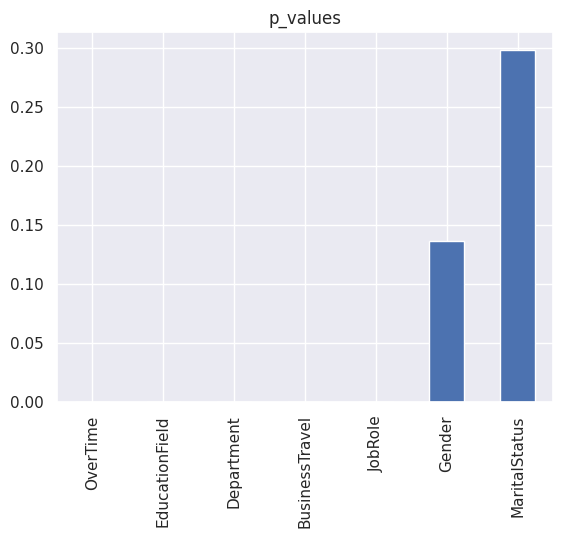

In [156]:
p_values.plot.bar(title='p_values')

Marital Status and gender has less influence on target column

In [157]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.05382709, 0.00996428, 0.2686679 , 0.01844712, 0.00972589,
       0.00861099, 0.        , 0.0026078 , 0.01281814, 0.04937429,
       0.        , 0.02942439, 0.05777605, 0.02190482, 0.02477834,
       0.34911168, 0.30137858, 0.00513521, 0.06048693, 0.00593081,
       0.00582504, 0.        , 0.03606607, 0.05404905, 0.00713764,
       0.        , 0.05916855, 0.04815927, 0.01823188, 0.05629157])

In [158]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

MonthlyIncome               0.349112
MonthlyRate                 0.301379
DailyRate                   0.268668
OverTime                    0.060487
YearsAtCompany              0.059169
JobRole                     0.057776
YearsWithCurrManager        0.056292
TotalWorkingYears           0.054049
Age                         0.053827
HourlyRate                  0.049374
YearsInCurrentRole          0.048159
StockOptionLevel            0.036066
JobLevel                    0.029424
MaritalStatus               0.024778
JobSatisfaction             0.021905
Department                  0.018447
YearsSinceLastPromotion     0.018232
Gender                      0.012818
BusinessTravel              0.009964
DistanceFromHome            0.009726
Education                   0.008611
TrainingTimesLastYear       0.007138
PercentSalaryHike           0.005931
PerformanceRating           0.005825
NumCompaniesWorked          0.005135
EnvironmentSatisfaction     0.002608
RelationshipSatisfaction    0.000000
W

<Axes: >

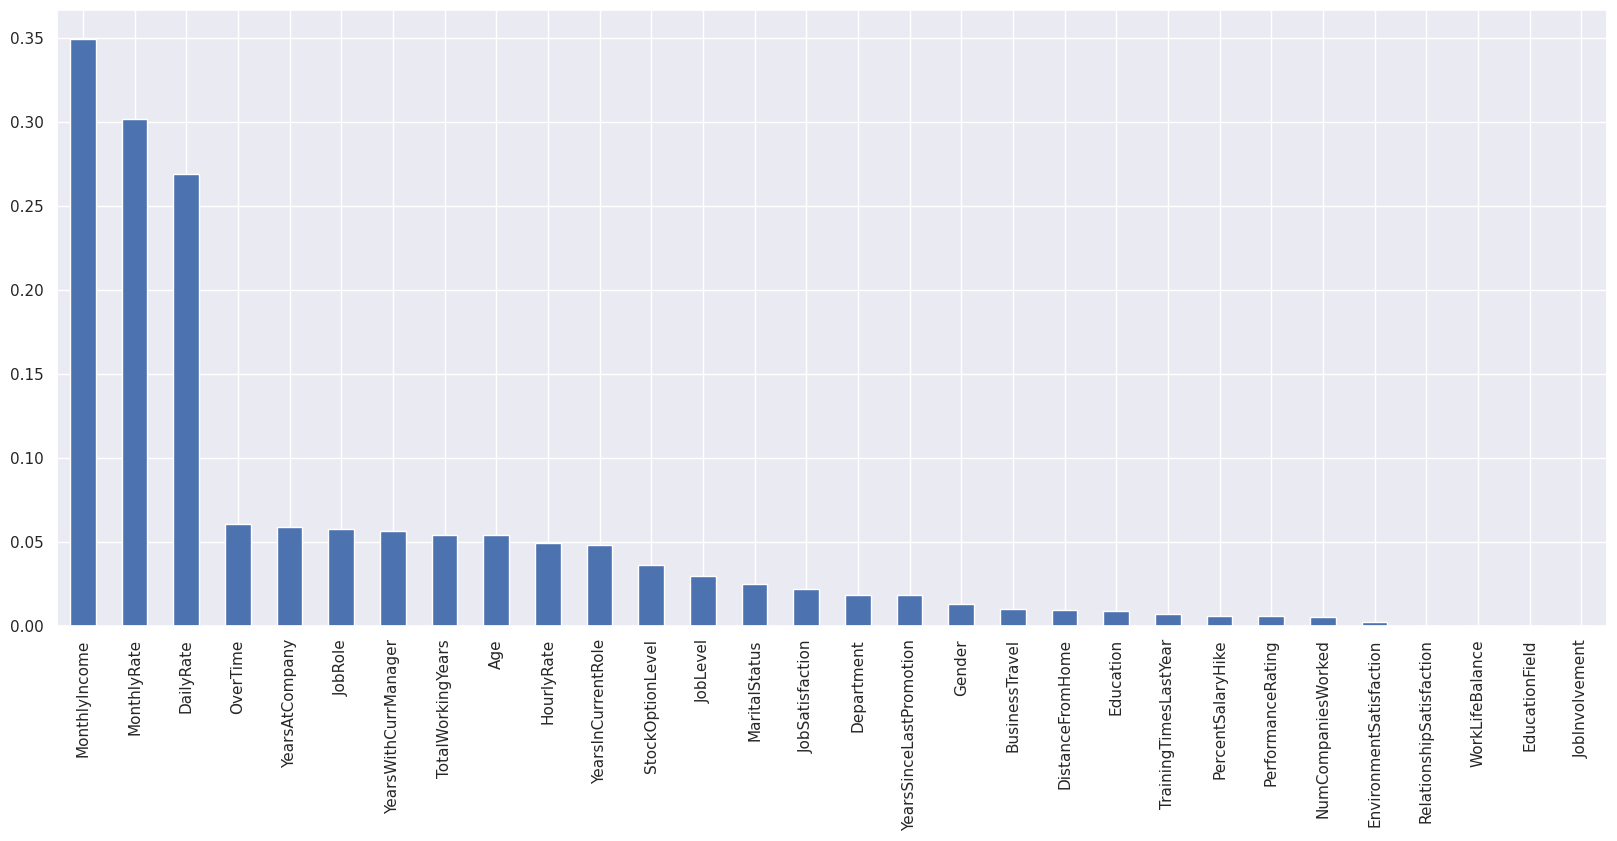

In [159]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [160]:
mutual_info=mutual_info[mutual_info==0]

In [161]:
drop_col=mutual_info.index

In [162]:
#droping non significant columns
X_train.drop(drop_col,axis=1,inplace=True)
X_test.drop(drop_col,axis=1,inplace=True)

## Wrapper Method

In [164]:
X_train.shape

(1972, 26)

In [165]:
rf=RandomForestClassifier(random_state=42)

In [166]:
sfs = SFS(rf, k_features=7, forward=True, floating=False, scoring='accuracy',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          k_features=(7, 7), scoring='accuracy')

In [170]:
new_col=sfs.k_feature_idx_

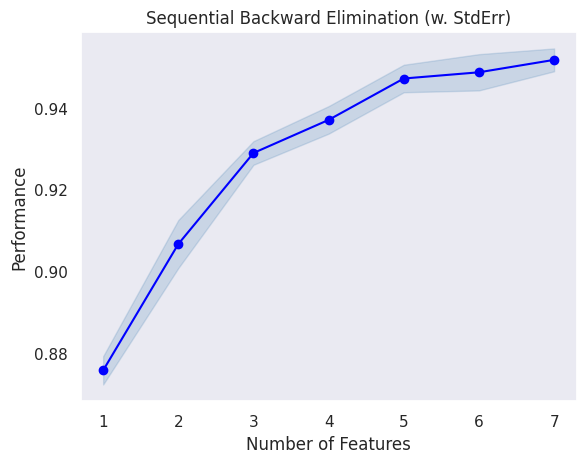

In [168]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [171]:
new_col

(2, 9, 13, 14, 17, 20, 24)

In [173]:
new_col=np.array(new_col)

In [174]:
new_col

array([ 2,  9, 13, 14, 17, 20, 24])

In [175]:
X_train = X_train[X_train.columns[new_col]]
X_test = X_test.iloc[:,new_col]

# Model Building

In [176]:
fit_rf = RandomForestClassifier(random_state=42)

## Hyperparameter Tuning for Random Forest

In [177]:
param_dist = {'max_depth': [2,3,4,5,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
               'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = -1)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': None}


In [178]:
# setting model with best parameter
fit_rf.set_params(criterion = 'gini',
                  max_features =None,
                  max_depth = 8,bootstrap=True)

RandomForestClassifier(max_depth=8, max_features=None, random_state=42)

## Out of bag Estimation

In [179]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [180]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

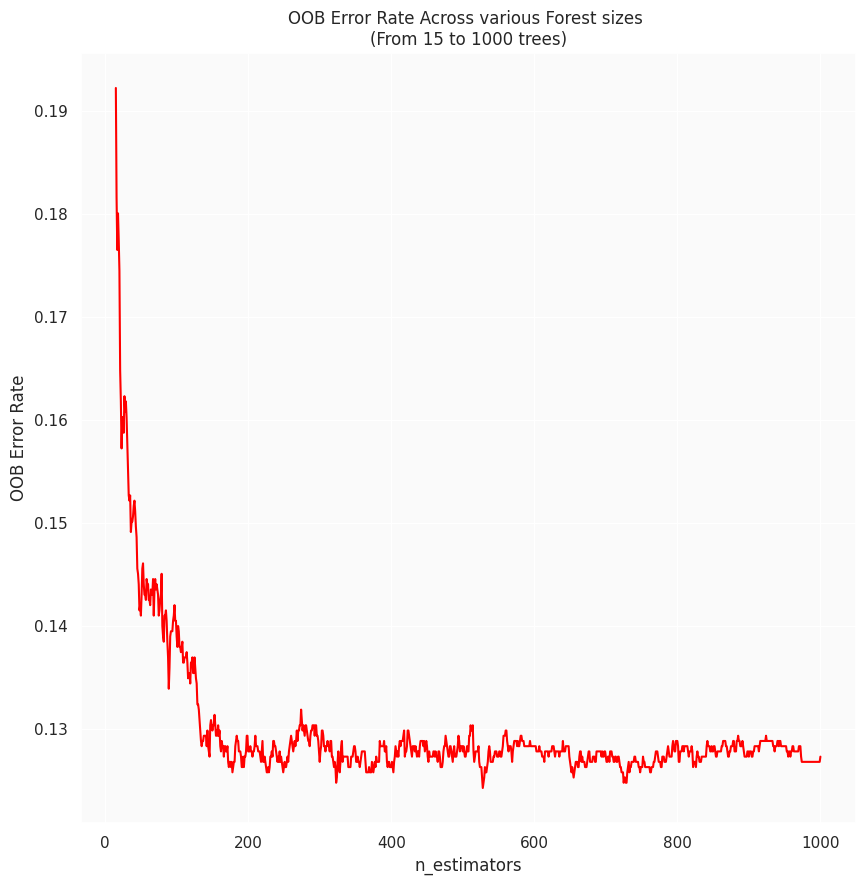

In [181]:

#plotting n_estimators vs error_rate
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')

plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

## Training the model

In [182]:
fit_rf.set_params(n_estimators=201,
                  bootstrap = True,
                  warm_start=False,
                  oob_score=False)

RandomForestClassifier(max_depth=8, max_features=None, n_estimators=201,
                       random_state=42)

In [183]:
fit_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=None, n_estimators=201,
                       random_state=42)

In [184]:
sorted_idx =fit_rf.feature_importances_.argsort()

In [185]:
sorted_idx

array([1, 6, 4, 5, 3, 0, 2])

<BarContainer object of 7 artists>

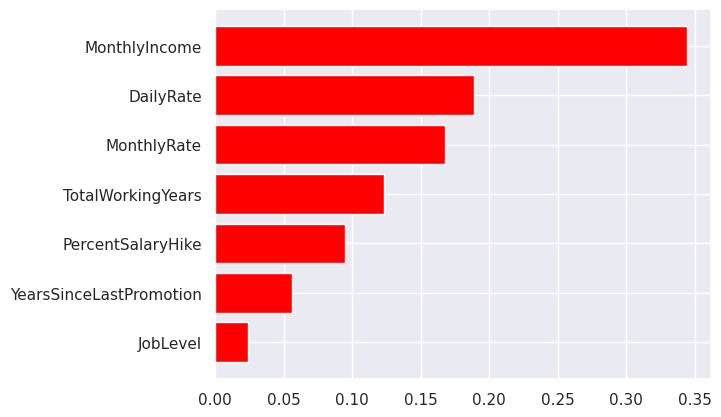

In [186]:

plt.barh(X_train.columns[sorted_idx], fit_rf.feature_importances_[sorted_idx],color='red')

## Prediction

In [188]:
y_pred = fit_rf.predict(X_test)

## Evaluation

Accuracy: 0.8724696356275303
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       248
           1       0.86      0.89      0.87       246

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494

[[212  36]
 [ 27 219]]


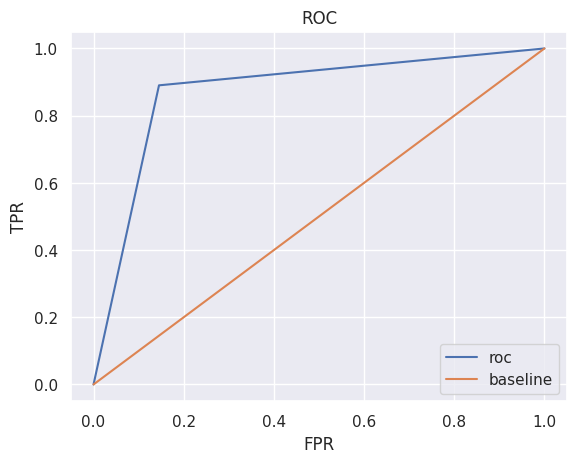

roc_auc_score: 0.8725413060582218


In [189]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
#ploting ROC curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='roc')
plt.plot([0,1],[0,1],label='baseline')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

#print roc_auc_score
print(f'roc_auc_score: {roc_auc_score(y_test,y_pred)}')

#Model Building Using Voting Classifier

In [196]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [197]:
estimators = [('dc',clf1),('rf',clf2),('knn',clf3)]

In [198]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

dc 0.92
rf 0.98
knn 0.79


In [199]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')

## Model Training

In [200]:
vc1.fit(X_train,y_train)

VotingClassifier(estimators=[('dc', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

## Model Prediction

In [201]:
y_pred = vc1.predict(X_test)

##  Model Evaluation

Accuracy: 0.9331983805668016
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       248
           1       0.89      0.99      0.94       246

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.93      0.93       494

[[217  31]
 [  2 244]]


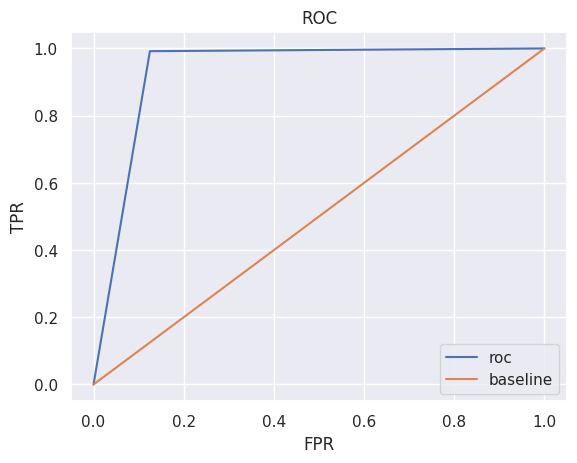

roc_auc_score: 0.9334349593495934


In [202]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
#ploting ROC curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='roc')
plt.plot([0,1],[0,1],label='baseline')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

#print roc_auc_score
print(f'roc_auc_score: {roc_auc_score(y_test,y_pred)}')

# Conclusion

- monthly Income,monthly rate,Daily rate and overtime is the top reason why employees are leaving the company



